# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [1]:
import pandas as pd
#all data
all_data = pd.read_excel('alldata.xlsx')
df_dr = pd.read_excel('drdata.xlsx')
df_tv2 = pd.read_excel('tv2data.xlsx')
#questions from each TV station
df_drq = pd.read_excel('drq.xlsx')
df_tv2q = pd.read_excel('tv2q.xlsx')
#elected data
df_electeddata = pd.read_excel('electeddata.xlsx')


In [2]:
# Color codes from assignment graph
party_colors = {
    'A': '#b32722',  # Social Democrats
    'V': '#006697',  # Danish Liberal Party
    'M': '#6c39e5',  # Moderates
    'F': '#dd0878',  # Socialist People's Party
    'D': '#054f5c',  # Denmark Democrats
    'I': '#21c6cf',  # Liberal Alliance
    'C': '#9eba27',  # Conservative People's Party
    'Æ': '#8ac3ff',  # Red-Green Alliance
    'B': '#713280',  # Social Liberal Party
    'Ø': '#ed8019',  # New Right (Far-right)
    'Z': '#2a8f39',  # The Alternative
    'O': '#f3cd41',  # Danish People's Party
    'G': '#00e66a',  # Free Greens
    'K': '#bababa',   # Christian Democrats
    'L': 'skyblue'
}
# Define the mapping for all unique parties
party_name_mapping = {
    'Socialdemokratiet': 'A',  # Social Democrats
    'Venstre': 'V',  # Danish Liberal Party
    'Moderaterne': 'M',  # Moderates
    'Socialistisk Folkeparti': 'F',  # Socialist People's Party
    'Danmarksdemokraterne': 'D',  # Denmark Democrats
    'Liberal Alliance': 'I',  # Liberal Alliance
    'Det Konservative Folkeparti': 'C',  # Conservative People's Party
    'Enhedslisten': 'Æ',  # Red-Green Alliance
    'Radikale Venstre': 'B',  # Social Liberal Party
    'Nye Borgerlige': 'Ø',  # New Right
    'Alternativet': 'Z',  # The Alternative
    'Dansk Folkeparti': 'O',  # Danish People's Party
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'G',  # Free Greens
    'Kristendemokraterne': 'K',  # Christian Democrats
    'Løsgænger': 'L'  # Independent 
}

# Create a new column 'parti_short' with the short party letters
all_data['parti_short'] = all_data['parti'].replace(party_name_mapping)

## Question 1 

- show the age of the canditates grouped by party

In [3]:
# Where is age 0?
invalid_ages = all_data[all_data['alder'] == 0]

# Remove rows with age 0
df_all = all_data[all_data['alder'] != 0]
# Group by party short and calculate the statistics for age
age_by_party_stats = df_all.groupby('parti')['alder'].describe()

# Display the statistics
display(age_by_party_stats)


,count,mean,std,min,25%,50%,75%,max
parti,,,,,,,,
Alternativet,65.0,47.415385,13.620862,21.0,39.00,48.0,58.00,79.0
Danmarksdemokraterne,37.0,51.216216,10.252737,24.0,45.00,53.0,59.00,69.0
Dansk Folkeparti,49.0,45.530612,12.191360,20.0,39.00,47.0,54.00,75.0
Det Konservative Folkeparti,94.0,44.723404,11.904101,20.0,37.00,48.0,53.00,66.0
Enhedslisten,71.0,42.225352,15.193229,19.0,31.00,41.0,53.50,74.0
"Frie Grønne, Danmarks Nye Venstrefløjsparti",26.0,34.807692,10.777826,20.0,27.50,33.0,37.50,62.0
Kristendemokraterne,41.0,50.219512,13.441563,21.0,43.00,50.0,61.00,73.0
Liberal Alliance,68.0,37.970588,13.736291,18.0,26.00,37.0,46.00,72.0
Løsgænger,3.0,48.000000,9.165151,40.0,43.00,46.0,52.00,58.0


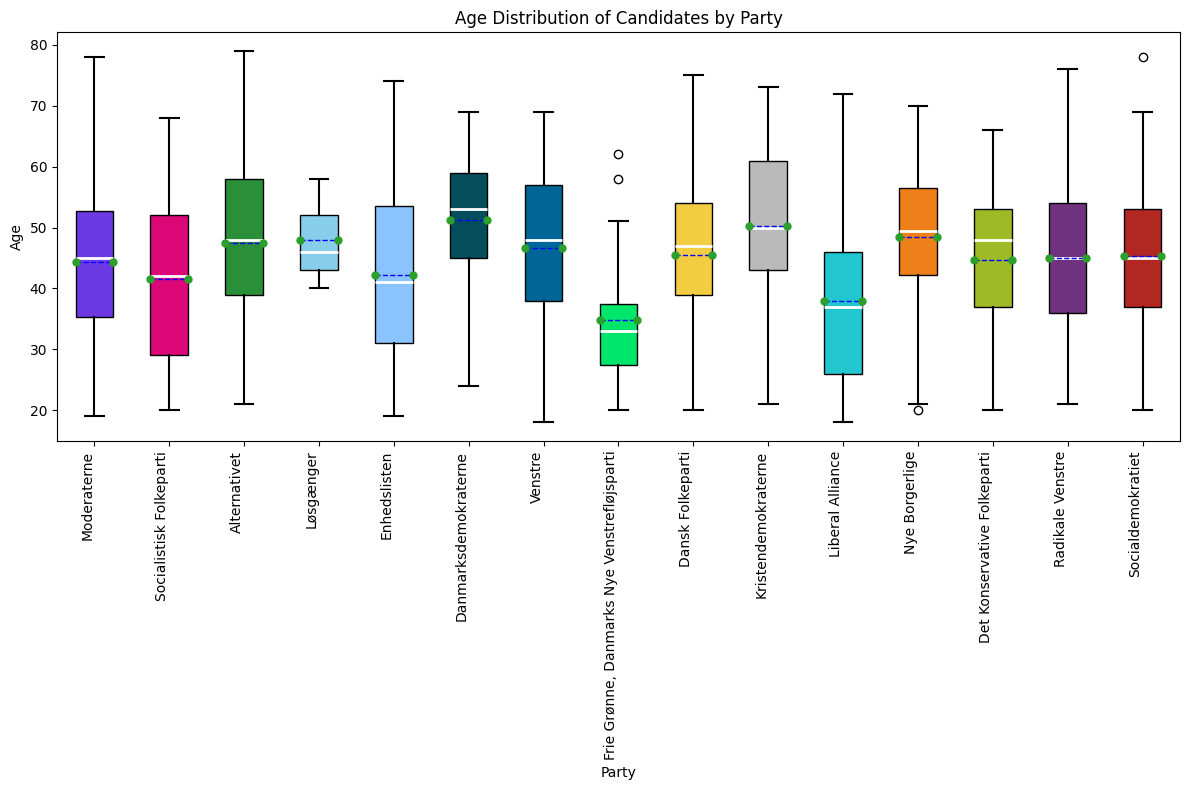

In [4]:
import matplotlib.pyplot as plt

# Ensure only valid party labels are used (dropping NaN)
df_filtered = df_all.dropna(subset=['parti_short', 'alder'])

# Reorder the data to ensure the party colors and labels match
party_order = df_filtered['parti_short'].unique()  # Extract unique party short names

# Map the party short names back to the full names for x-axis labels
party_full_names = {v: k for k, v in party_name_mapping.items()}
x_labels = [party_full_names[party] for party in party_order]

# Prepare the data for box plot
data_to_plot = [df_filtered[df_filtered['parti_short'] == party]['alder'].dropna() for party in party_order]

# Create the box plot
fig, ax = plt.subplots(figsize=(12, 8))

# Box plot parameters
box = ax.boxplot(data_to_plot, patch_artist=True, showmeans=True, meanline=True)

# Color the boxes according to the party colors
for patch, party in zip(box['boxes'], party_order):
    patch.set_facecolor(party_colors[party])

# Set x-axis labels to full party names
ax.set_xticklabels(x_labels, rotation=90, ha='right')

# Add labels and title
plt.title('Age Distribution of Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Age')

# Customize the appearance of the box plot further (optional)
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
for median in box['medians']:
    median.set(color='white', linewidth=2)  # White line for median
for mean in box['means']:
    mean.set(marker='o', color='blue', markersize=5)  # Customize the mean marker

# Show the plot
plt.tight_layout()
plt.show()


## Question 2
- an overview of the most "confident" candiates, those with highest proportion of strongly agree or disagree.

In [5]:
import pandas as pd
import plotly.express as px


# Choosing columns with answers
response_columns = all_data.columns[all_data.columns.str.contains(r'\d')]
# Sum if response is either strongly agree (2) or strongly disagree (-2)
all_data['count_strongly_disagree']=  all_data[response_columns].apply(lambda row: (row == -2).sum(), axis=1)
all_data['count_strongly_agree']=  all_data[response_columns].apply(lambda row: (row == 2).sum(), axis=1)
all_data['count_total'] = all_data['count_strongly_agree'] + all_data['count_strongly_disagree']

# Calculate the proportion of confident responses to number of questions
all_data['total_responses'] = all_data[response_columns].notna().sum(axis=1)
all_data['proportion_confident'] = round(all_data['count_total'] *100/ all_data['total_responses'])

# Sort by the proportion of confident responses in descending order
df_confident_candidates = all_data[['navn', 'parti','count_strongly_disagree', 'count_strongly_agree', 'count_total', 'proportion_confident']].sort_values(by='proportion_confident', ascending=False).head(10)

# Display the top confident candidates
display(df_confident_candidates)


# Create the bar chart
fig = px.bar(df_confident_candidates, 
             x="proportion_confident", 
             y="navn", 
             labels={
                     "proportion_confident": "Proportion of confident answers (%)",
                     "navn": "Name"
                 },
             title="The most controversial candidates based on the proportion of strongly agree or disagree answers",
             text="parti", 
             hover_data={"parti": True, "navn": True, "count_total": True, "proportion_confident": True, "count_strongly_agree": True, "count_strongly_disagree": True},
             orientation='h')


# Show the figure
fig.show()

,navn,parti,count_strongly_disagree,count_strongly_agree,count_total,proportion_confident
505,Sarah Nørris,Enhedslisten,25,24,49,100.0
88,Søren Vanting,Det Konservative Folkeparti,31,18,49,100.0
559,Kim Andkjær Doberck,Nye Borgerlige,22,22,44,90.0
44,Mohamed Abdikarim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",22,21,43,88.0
152,Rashid Ali,"Frie Grønne, Danmarks Nye Venstrefløjsparti",20,23,43,88.0
503,Jan Filbært,Enhedslisten,23,19,42,86.0
437,Lone Vase Langballe,Dansk Folkeparti,19,23,42,86.0
284,John Bjerg,Nye Borgerlige,24,18,42,86.0
359,Frank Sørensen,Dansk Folkeparti,17,25,42,86.0
151,Elise Bjerkrheim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",19,23,42,86.0


## Question 3 
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

C:\Users\lilla\AppData\Local\Temp\ipykernel_2612\4175887471.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




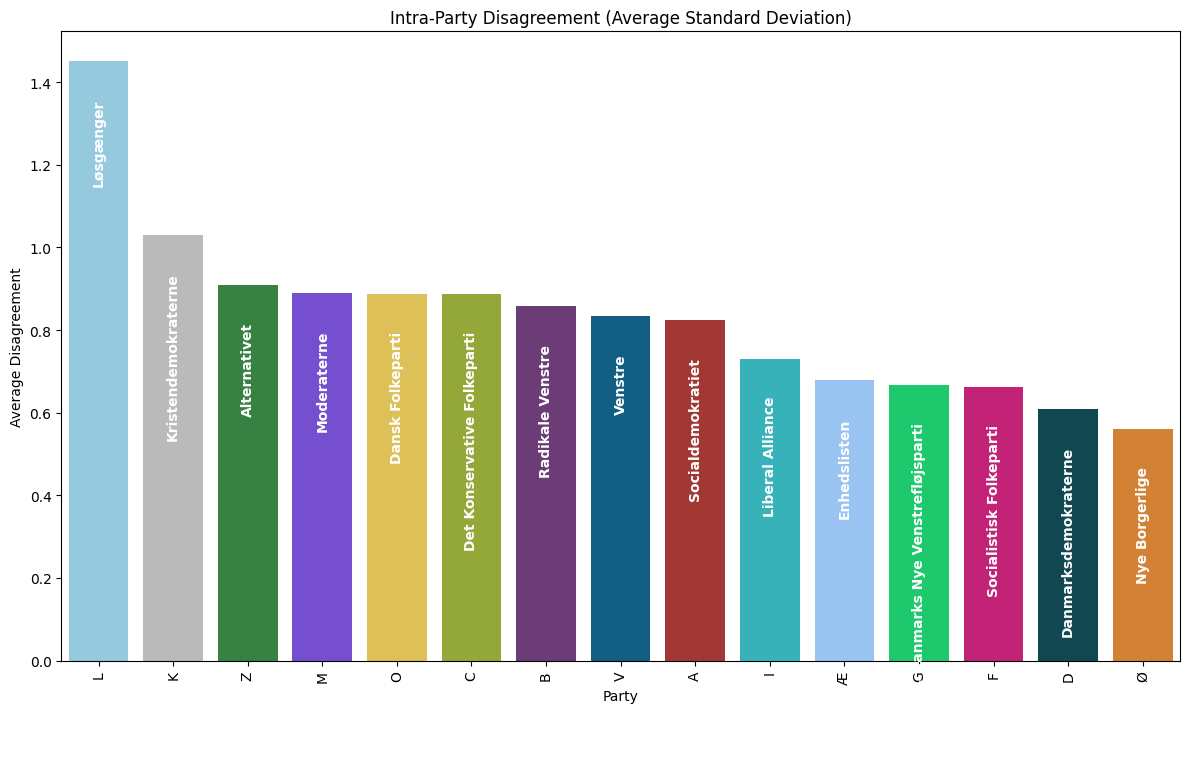

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `all_data` is the DataFrame with all candidate responses
# Load the relevant response columns
response_columns = all_data.columns[all_data.columns.str.contains(r'\d')]

### Intra-Party Analysis: Measure internal disagreement within each party
intra_party_disagreement = all_data.groupby('parti_short')[response_columns].std()
intra_party_disagreement['avg_disagreement'] = intra_party_disagreement.mean(axis=1)

# Sort parties by their internal disagreement (higher standard deviation = more internal disagreement)
intra_party_disagreement_sorted = intra_party_disagreement[['avg_disagreement']].sort_values(by='avg_disagreement', ascending=False)

# Get party colors based on the sorted parties
colors = [party_colors[party] for party in intra_party_disagreement_sorted.index]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x=intra_party_disagreement_sorted.index, 
                   y=intra_party_disagreement_sorted['avg_disagreement'], 
                   palette=colors, ax=ax)

# Add full party names as labels on top of each bar, rotated by 90 degrees
for bar, party_short in zip(bars.patches, intra_party_disagreement_sorted.index):
    # Get the full party name using the mapping
    full_party_name = party_full_names[party_short]
    
    # Position the text in the middle of the bar, slightly below the height of the bar
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() - 0.09,  # Adjust label slightly below bar height
            full_party_name, 
            ha='center', va='top', color='white', fontsize=10, fontweight='bold', rotation=90)

# Customize plot
plt.title('Intra-Party Disagreement (Average Standard Deviation)')
plt.xlabel('Party')
plt.ylabel('Average Disagreement')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
import pandas as pd

# Set to display all columns if needed
pd.set_option('display.max_columns', None)

# Find all columns that contain a number in their name (assuming these are the response columns)
response_columns = all_data.columns[all_data.columns.str.contains(r'\d')]

# Sum the responses for each candidate (considering all response types)
# 2 = strongly agree, 1 = agree, 0 = neutral, -1 = disagree, -2 = strongly disagree
all_data['total_score'] = all_data[response_columns].sum(axis=1)

# Calculate the total number of valid responses (non-NaN values)
all_data['total_responses'] = all_data[response_columns].notna().sum(axis=1)

# Calculate the average score per candidate (normalized confidence score)
all_data['average_confidence_score'] = all_data['total_score'] / all_data['total_responses']

# Sort candidates by their average confidence score in descending order
df_confident_candidates = all_data[['navn', 'parti', 'average_confidence_score']].sort_values(by='average_confidence_score', ascending=False)

# Display the sorted DataFrame
display(df_confident_candidates)
# Calculate the average confidence score per party
average_scores_per_party = all_data.groupby('parti')['average_confidence_score'].mean().reset_index()

display(average_scores_per_party.sort_values(by='average_confidence_score', ascending=False))

,navn,parti,average_confidence_score
3,Nicklas Gjedsig Larsen,Alternativet,0.816327
532,Henrik Engelbrekt Refshauge,Kristendemokraterne,0.714286
785,Jesper Callesen,Alternativet,0.612245
107,Anna Thusgård,Socialdemokratiet,0.591837
54,Henrik Rejnholt Andersen,Moderaterne,0.571429
...,...,...,...
474,Mogens Birkelund,Det Konservative Folkeparti,-0.448980
567,Dorthe Schmittroth,Det Konservative Folkeparti,-0.448980
659,Nicolai Wøldike Sandager,Liberal Alliance,-0.469388
32,Tina Lund Sørensen,Venstre,-0.489796


,parti,average_confidence_score
9,Moderaterne,0.315841
13,Socialistisk Folkeparti,0.252770
12,Socialdemokratiet,0.247947
0,Alternativet,0.215656
6,Kristendemokraterne,0.181730
11,Radikale Venstre,0.175754
2,Dansk Folkeparti,0.131195
4,Enhedslisten,0.095422
5,"Frie Grønne, Danmarks Nye Venstrefløjsparti",0.091837
8,Løsgænger,-0.013605


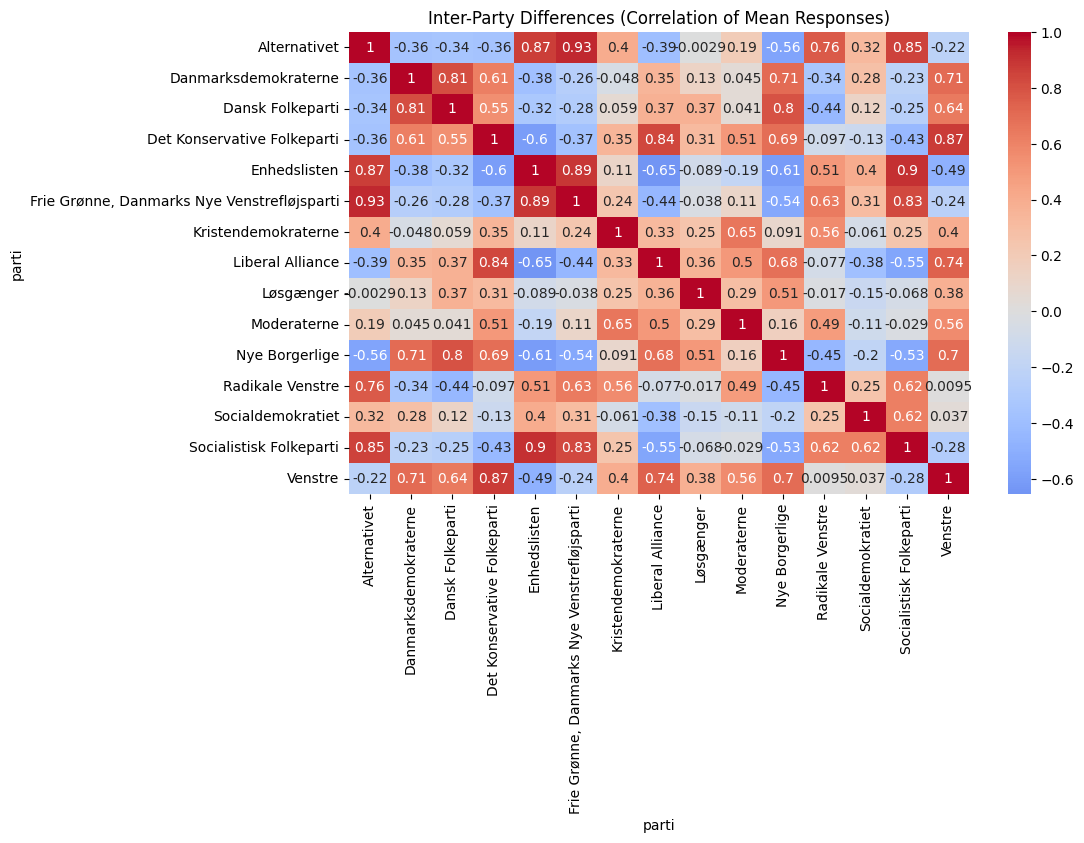

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

response_columns = all_data.columns[all_data.columns.str.contains(r'\d')]

### Intra-Party Analysis: Measure internal disagreement within each party

intra_party_disagreement = all_data.groupby('parti')[response_columns].std()
intra_party_disagreement['avg_disagreement'] = intra_party_disagreement.mean(axis=1)

# Sort parties by their internal disagreement (higher standard deviation = more internal disagreement)
intra_party_disagreement_sorted = intra_party_disagreement[['avg_disagreement']].sort_values(by='avg_disagreement', ascending=False)


### Inter-Party Analysis: Measure differences between parties

party_mean_responses = all_data.groupby('parti')[response_columns].mean()
inter_party_differences = party_mean_responses.T.corr()


# Inter-Party Differences Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(inter_party_differences, annot=True, cmap='coolwarm', center=0)
plt.title('Inter-Party Differences (Correlation of Mean Responses)')
plt.show()

## Grouping of the candidates based on their answers
Using t-SNE algorithm

In [9]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px


# Separate features (responses) and labels (parties)
X = all_data[response_columns]
parties = all_data["parti"]

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # You can adjust perplexity based on dataset size
tsne_result = tsne.fit_transform(X)

# Add t-SNE results to the dataframe
all_data['tSNE1'] = tsne_result[:, 0]
all_data['tSNE2'] = tsne_result[:, 1]

# Create a scatter plot using t-SNE results
fig = px.scatter(all_data, x='tSNE1', y='tSNE2', color='parti', hover_data={'navn': True, 'tSNE1': False, 'tSNE2': False},
                 title="Candidates Split by Answers")

# Update layout to hide axis labels and grid
fig.update_layout(
    xaxis_title='',    # Remove x-axis label
    yaxis_title='',    # Remove y-axis label
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),  # Hide grid and axis line
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)   # Hide grid and axis line
)
# Show the plot
fig.show()


# Question 4 - Machine Learning Models


In [10]:
performance_df = pd.DataFrame(columns=['Model', 'Accuracy'])

### 1. Decision Tree
- predict which party would the canditate fit for based on the answers

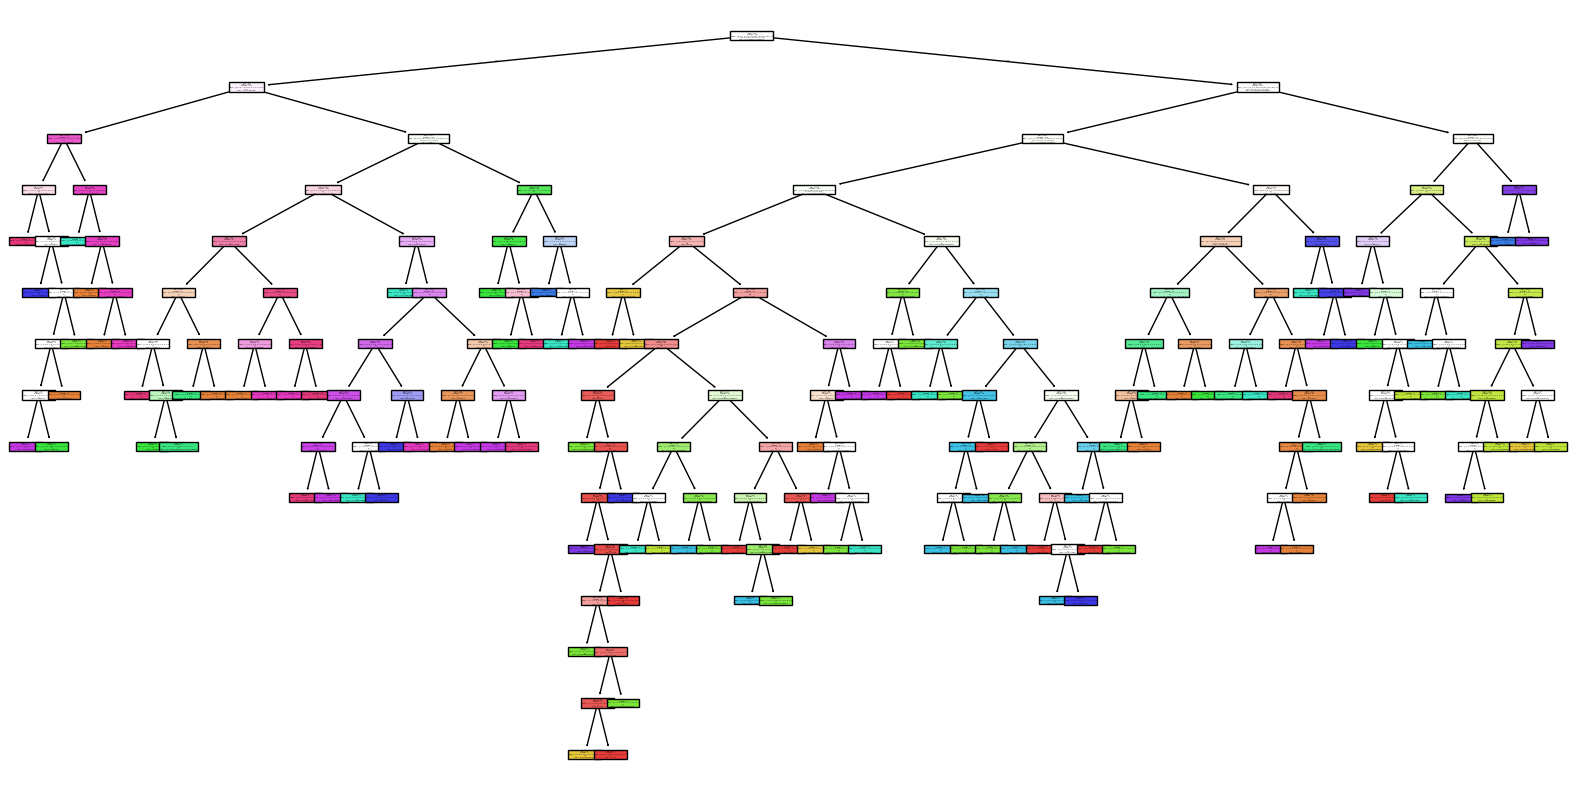

Test Accuracy: 0.73


AttributeError: 'DataFrame' object has no attribute 'append'

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Features: responses to questions
X = all_data[response_columns]  # assuming response_columns is defined

# Target: party affiliation
y = all_data['parti']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=response_columns, class_names=clf.classes_, filled=True)
plt.show()

# Check the accuracy on the test set
accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

performance_df = performance_df.append({
        'Model': 'DecisionTreeClassifier',
        'Accuracy': accuracy,
    }, ignore_index=True)


### Random Forest
- Predicting Candidate Confidence Levels:
You can classify candidates based on their confidence levels derived from their survey responses.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assume all_data contains confidence levels and responses
# Create confidence level labels based on proportion of extreme responses
all_data['confidence_level'] = pd.cut(all_data['proportion_confident'], bins=[-np.inf, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Features: responses to questions
X = all_data[response_columns]  # Features (responses)

# Target: confidence level
y = all_data['confidence_level']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


performance_df = performance_df.append({
        'Model': 'RandomForestClassifier',
        'Accuracy': accuracy,
    }, ignore_index=True)


Test Accuracy: 0.84


C:\Users\veron\AppData\Local\Temp\ipykernel_22436\2086174998.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


### Gradient Boosted Tree
- back to prediciton of the party

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.85


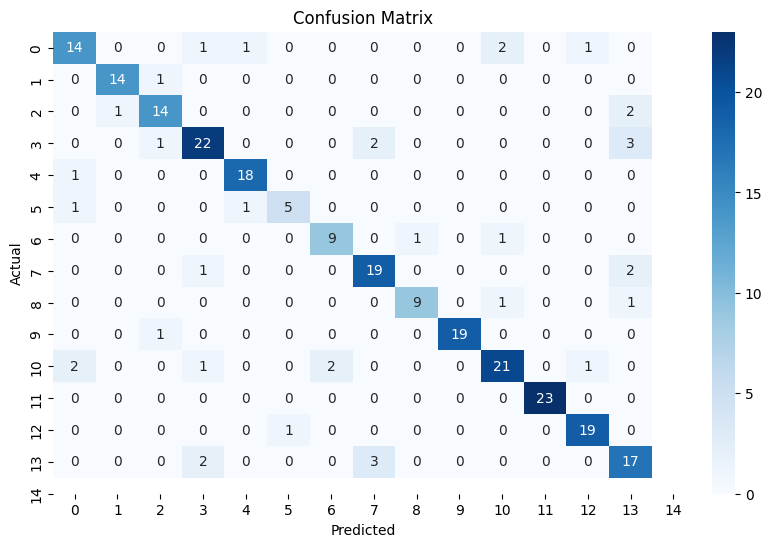

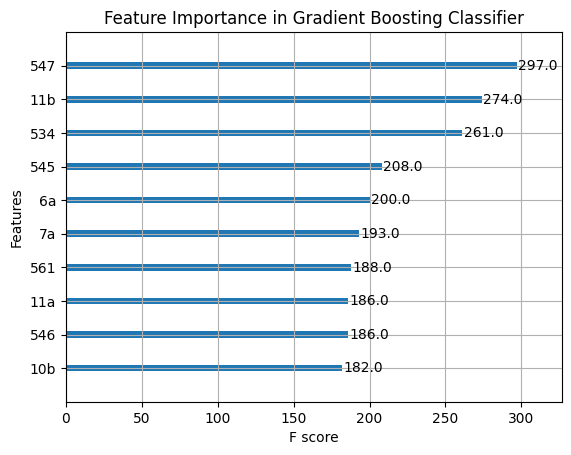

C:\Users\veron\AppData\Local\Temp\ipykernel_22436\1049836229.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming `all_data` is your DataFrame and response_columns is defined
# Find all columns that contain a number in their name
response_columns = all_data.columns[all_data.columns.str.contains(r'\d')]

# Features: responses to questions
X = all_data[response_columns]  # Features (responses)


# Target: party affiliation
y = all_data['parti']  # Target variable (party affiliation)
le = LabelEncoder()
y = le.fit_transform(y)  # Transform categorical labels to numerical labels
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier (XGBoost)
gbt_model = xgb.XGBClassifier(
    n_estimators=100,         # Number of boosting rounds
    learning_rate=0.1,        # Step size shrinkage
    max_depth=3,              # Maximum tree depth
    random_state=42,
    use_label_encoder=False,   # Use this to suppress warnings
    eval_metric='mlogloss'    # Evaluation metric
)

# Train the model
gbt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gbt_model.classes_, yticklabels=gbt_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
xgb.plot_importance(gbt_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()

performance_df = performance_df.append({
        'Model': 'GradientBoosted Tree',
        'Accuracy': accuracy,
    }, ignore_index=True)


Important Questions: 547, 11b, 534, 545, 6a, 7a, 561, 11a, 546, 10b

In [72]:
list_of_important_questions = [547, '11b', 534, 545, '6a', '7a', 561, '11a', 546, '10b']
filtered_df_dr = df_drq[df_drq['ID'].isin(list_of_important_questions)]
filtered_df_tv2 = df_tv2q[df_tv2q['id'].isin(list_of_important_questions)]
filtered_df_dr.columns = filtered_df_dr.columns.str.lower()
combined = filtered_df_tv2.append(filtered_df_dr, ignore_index=True)
display(combined[['id', 'title', 'question']])


C:\Users\veron\AppData\Local\Temp\ipykernel_22436\2614004666.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = filtered_df_tv2.append(filtered_df_dr, ignore_index=True)


,id,title,question
0,6a,NaN,Den danske udlændingepolitik er for stram.
1,7a,NaN,Indførelse af atomkraft i Danmark vil være et ...
2,10b,NaN,"Den såkaldte Arne-pension, der giver mulighed ..."
3,11a,NaN,Der har været alt for meget fokus på Mette Fre...
4,11b,NaN,"Det bør undersøges, om Mette Frederiksen kan s..."
5,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU
6,545,ARBEJDSMARKED OG ØKONOMI,Pensionsalderen skal fortsætte med at stige i ...
7,546,KLIMA OG ENERGI,Danmark skal undersøge muligheden for at udvik...
8,547,DEMOKRATI,Der bør dannes en regering hen over midten
9,561,KLIMA OG ENERGI,"Det er en god idé med naturnationalparker, hvo..."


### Support Vector Machine
- also predict party


SVM Test Accuracy: 0.89


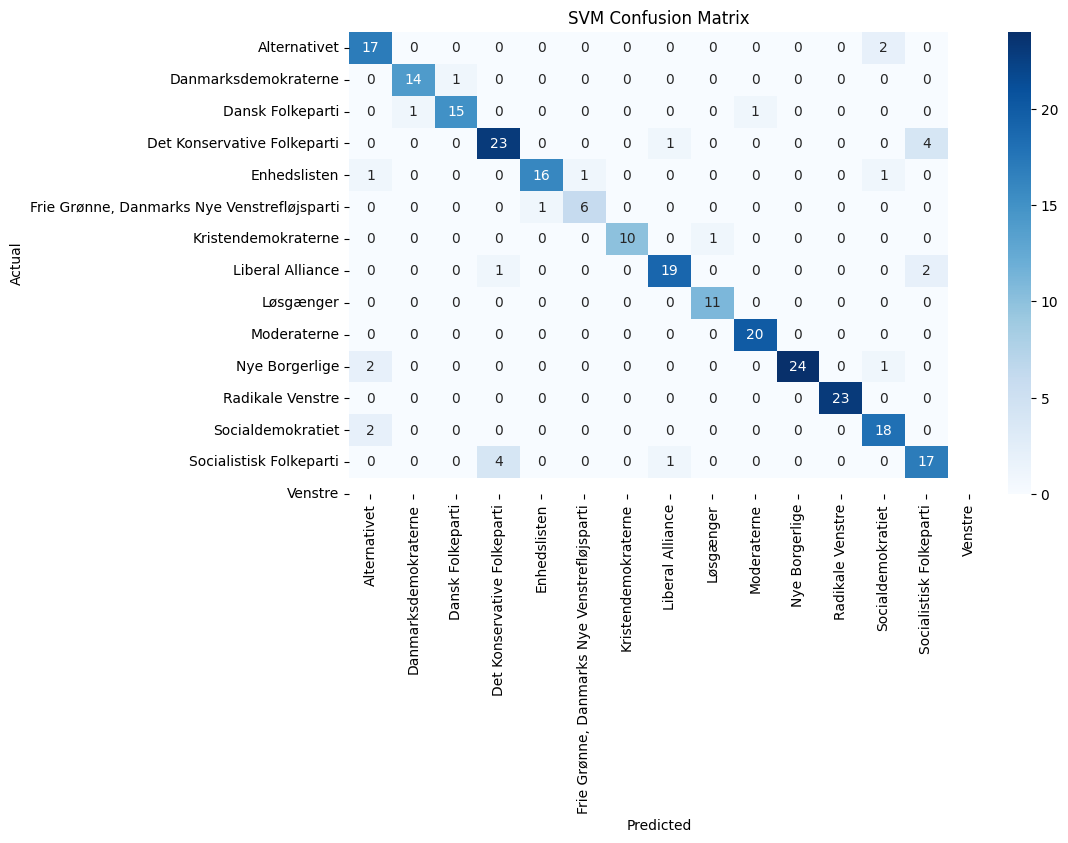

C:\Users\veron\AppData\Local\Temp\ipykernel_22436\2562377298.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm:.2f}")

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

performance_df = performance_df.append({
        'Model': 'Support Vector Machine',
        'Accuracy': accuracy_svm,
    }, ignore_index=True)


### Logistic Regression
- also predict party

Logistic Regression Test Accuracy: 0.90


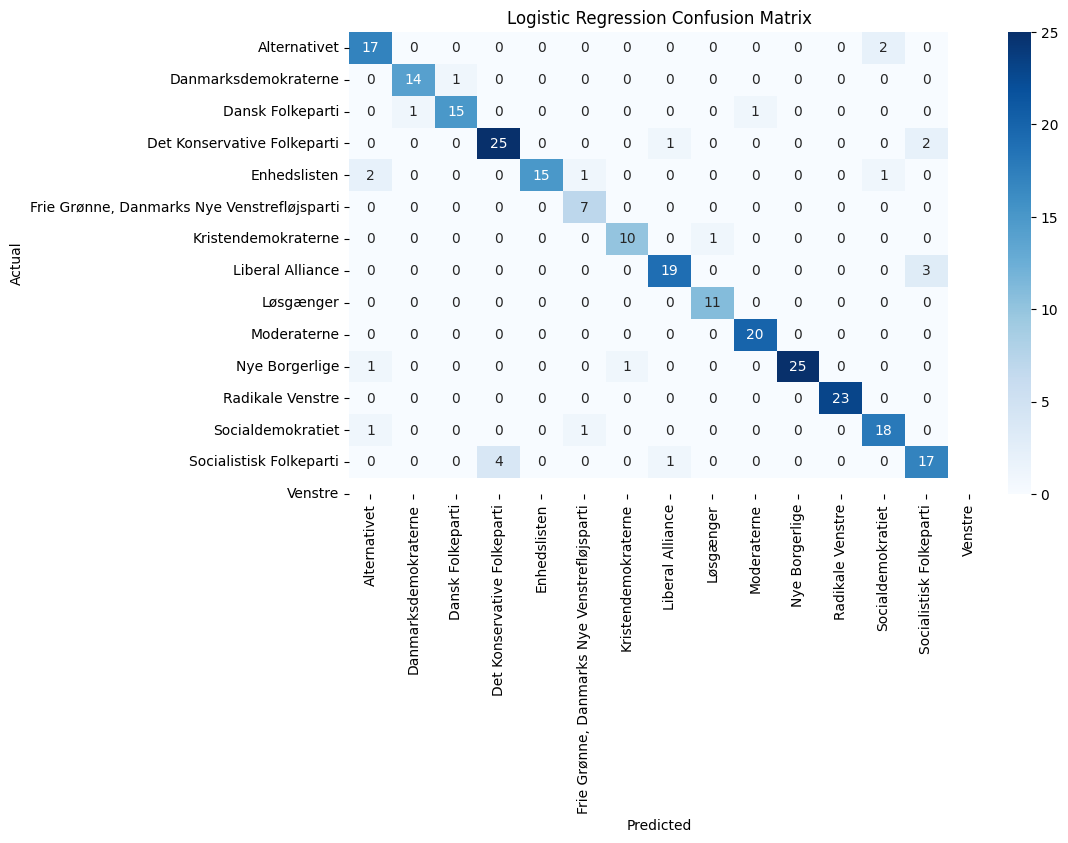

C:\Users\veron\AppData\Local\Temp\ipykernel_22436\1423269082.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({


In [74]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Test Accuracy: {accuracy_log_reg:.2f}")

# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

performance_df = performance_df.append({
        'Model': 'Logistic Regression',
        'Accuracy': accuracy_log_reg,
    }, ignore_index=True)


### Model Performance Overview

In [76]:
display(performance_df.sort_values(by='Accuracy', ascending=False))

,Model,Accuracy
4,Logistic Regression,0.904215
3,Support Vector Machine,0.892720
2,GradientBoosted Tree,0.854406
1,RandomForestClassifier,0.839080
0,DecisionTreeClassifier,0.731801
